In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/cancer/breast-cancer.csv", index_col="id")

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop(columns='Unnamed: 32')

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 31)

In [7]:
for col in df.columns:
    print(col)

diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Exploratory Data Analysis

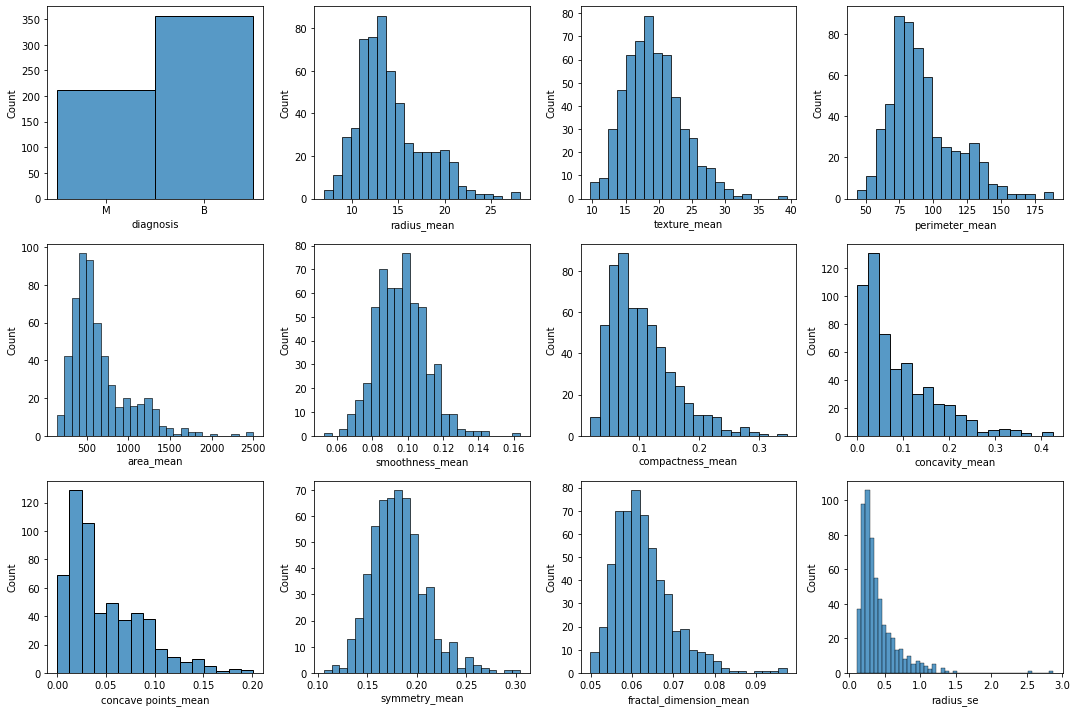

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(15,10))
axes = axes.flatten()
index=0

for col, val in df.items():
    sns.histplot(data=val, ax=axes[index])
    index += 1
    if index == 12:
        break

plt.tight_layout()

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

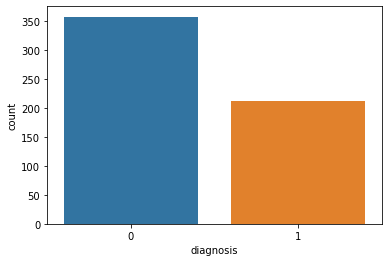

In [11]:
diagnosis_map = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(diagnosis_map)

sns.countplot(x=df['diagnosis'])

# Correlation matrix

<AxesSubplot:>

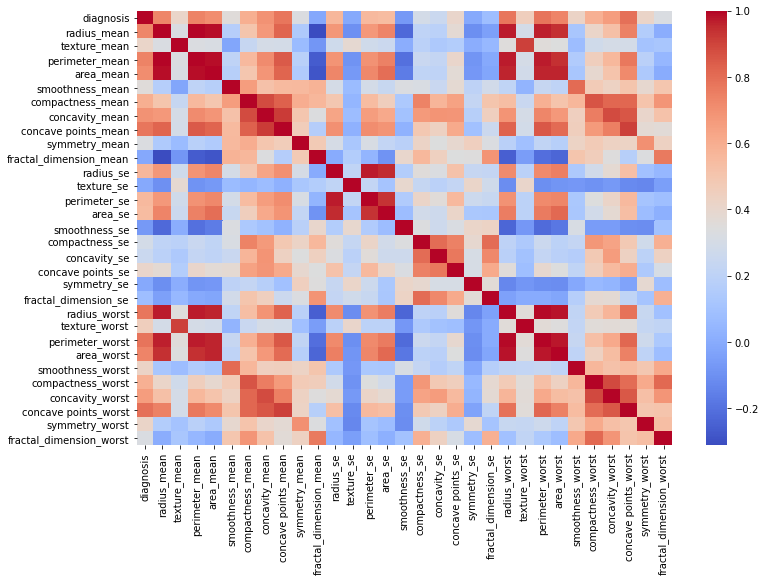

In [12]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')

In [13]:
abs(corr['diagnosis']).sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

# Import sklearn

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
sklearn.__version__

'0.23.2'

### Split data

In [16]:
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [17]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=52)

In [19]:
print(f"train set size: {x_train.shape}")
print(f"test set size: {x_test.shape}")

train set size: (398, 30)
test set size: (171, 30)


### Scale

In [20]:
scaler = StandardScaler()

In [21]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [22]:
print(np.min(x_train_sc))
print(np.max(x_train_sc))

-3.143107183458278
10.282640176781767


In [23]:
mm_scaler = MinMaxScaler()

In [24]:
x_train_mm = mm_scaler.fit_transform(x_train)
x_test_mm = mm_scaler.fit_transform(x_test)

In [25]:
print(np.min(x_train_mm))
print(np.max(x_train_mm))

0.0
1.0000000000000002


# Helper Methods

In [26]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=10,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring="balanced_accuracy",
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    print("Train accuracy:", train_scores_mean[-1])
    print("Test accuracy:", test_scores_mean[-1])
    print("Fit Time:", fit_times_mean[-1])
    
    return plt

In [27]:
def plot_model_curve(estimator, title, X, y, param_name, param_range, cv=10, n_jobs=None, x_scale_is_log=False):
    """
    https://scikit-learn.org/0.15/auto_examples/plot_validation_curve.html
    """
    
    train_scores, test_scores = validation_curve(
        estimator, 
        X, 
        y, 
        param_name=param_name, 
        param_range=param_range,
        cv=cv, 
        scoring="balanced_accuracy", 
        n_jobs=n_jobs
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    
    if x_scale_is_log:
        plt.xscale('log')

    plt.plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")

    plt.legend(loc="best")

    return plt

In [28]:
def plot_model_curve_boost_base(title, X, y, base_dt_param_name, base_dt_param_range, dt_params, ada_params, cv=10, n_jobs=None):
    """
    https://scikit-learn.org/0.15/auto_examples/plot_validation_curve.html
    """
    
    train_scores = []
    test_scores = []
    
    for bdp in base_dt_param_range:
        dt_params[base_dt_param_name] = bdp
        dt_clf = DecisionTreeClassifier(**dt_params)
        
        ada_params['base_estimator'] = dt_clf
        ada_clf = AdaBoostClassifier(**ada_params)

    
        test_score = cross_val_score(
            estimator=ada_clf,
            X=X,
            y=y,
            scoring="balanced_accuracy",
            cv=cv
        )
        
        ada_clf.fit(X, y)
        train_score = ada_clf.score(X, y)
    
        train_scores.append(train_score)
        test_scores.append(test_score.mean())

    plt.title(title)
    plt.xlabel(base_dt_param_name)
    plt.ylabel("Score")

    plt.plot(base_dt_param_range, train_scores, label="Training score", color="r")
    plt.plot(base_dt_param_range, test_scores, label="Cross-validation score", color="g")

    plt.legend(loc="best")

    return plt

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Coarse Grid Search

In [224]:
param_grid = [
    {
        'max_depth': range(10, 40),
        'ccp_alpha': [0.001, 0.01, 0.1],
    }
]

dt_clf = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(dt_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'ccp_alpha': 0.01, 'max_depth': 10}

### Learning Curve Analisis

Train accuracy: 0.9677999889337773
Test accuracy: 0.9343809523809524
Fit Time: 0.00830247402191162


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

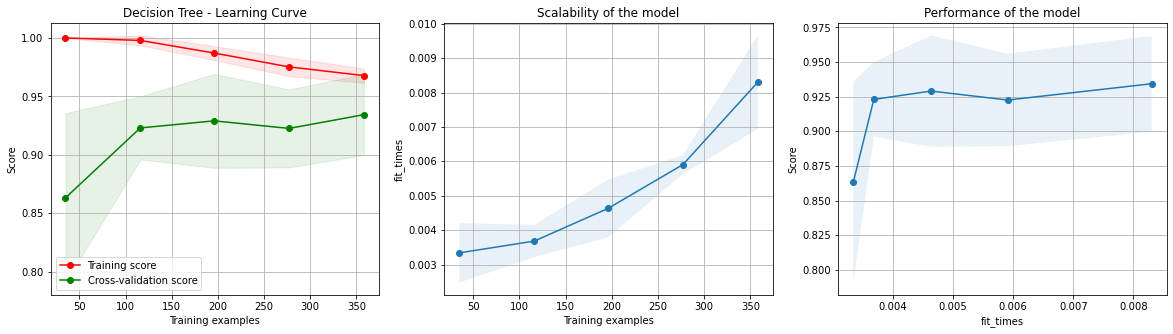

In [242]:
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01, max_depth=10)

plot_learning_curve(
    estimator=dt_clf, 
    title="Decision Tree - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

- model is overfitting (big gap, high accuracy score) 
- need to increase regularization

### Model complexity analysis

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

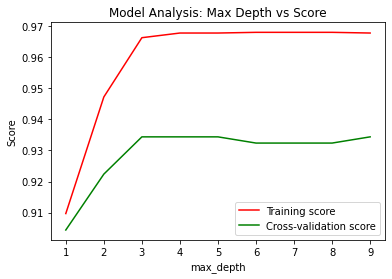

In [243]:
param_range = [i for i in range(0, 10)]
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)

plot_model_curve(
    estimator=dt_clf,
    title="Model Analysis: Max Depth vs Score",
    X=x_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=10
)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

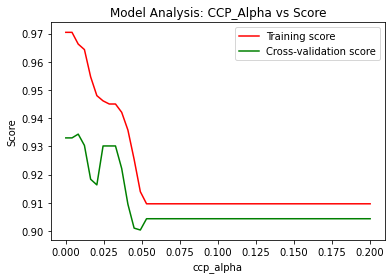

In [244]:
param_range = np.linspace(0.00, 0.2, 50)

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)

plot_model_curve(
    estimator=dt_clf,
    title="Model Analysis: CCP_Alpha vs Score",
    X=x_train,
    y=y_train,
    param_name="ccp_alpha",
    param_range=param_range,
    cv=10
)

Train accuracy: 0.9450352124091322
Test accuracy: 0.9301904761904762
Fit Time: 0.006158566474914551


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

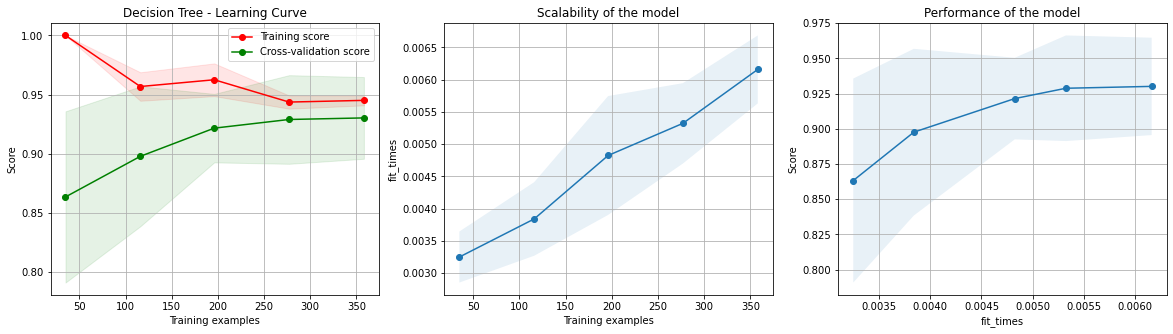

In [245]:
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.035, max_depth=3)

plot_learning_curve(
    estimator=dt_clf, 
    title="Decision Tree - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [246]:
final_dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.035, max_depth=3)
final_dt_clf.fit(x_train, y_train)

dt_y_preds = final_dt_clf.predict(x_test)

accuracy_score(y_test, dt_y_preds)

0.9590643274853801

# Neural Network

In [30]:
from sklearn.neural_network import MLPClassifier

### Coarse Grid Search

In [31]:
param_grid = [
    {
        'hidden_layer_sizes': [(5,), (10,), (25), (5, 5), (10, 10), (25, 25)],
        'activation': ['logistic', 'relu'],
        'alpha': [0.001, 0.01, 0.1]
    }
]

mlp_clf = MLPClassifier(random_state=0)

grid_search = GridSearchCV(mlp_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train_mm, y_train)

grid_search.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (25, 25)}

In [32]:
def nn_per_epoch(X, y, activation, alpha, momentum, solver, hidden_layer_size, max_epoches):
    epochs = []
    train_scores = []
    val_scores = []
    
    for epoch in range(10, max_epoches+1, 20):
        mlp_clf = MLPClassifier(
            hidden_layer_sizes=hidden_layer_size,
            activation=activation, 
            alpha=alpha, 
            max_iter=epoch,
            random_state=0
        )
        
        val_score = cross_val_score(
            estimator=mlp_clf,
            X=X,
            y=y,
            scoring="accuracy",
            cv=10
        )
        val_score = val_score.mean()
        
        mlp_clf.fit(X, y)
        train_score = mlp_clf.score(X, y)
        
        val_scores.append(val_score)
        train_scores.append(train_score)
        
        epochs.append(epoch)

    plt.title("Neural Net Learning Curve\nHidden Layers="+str(hidden_layer_size))
    plt.xlabel("epochs")
    plt.ylabel("Score")

    plt.plot(epochs, train_scores, label="Training score", color="r")
    plt.plot(epochs, val_scores, label="Cross-validation score", color="g")


    plt.legend(loc="best")
    plt.show()

### NN Architecture Selection

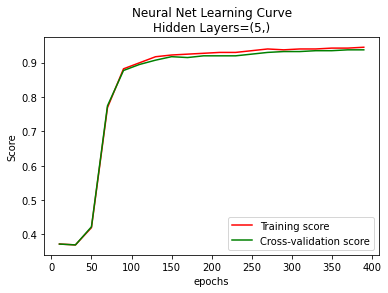

In [41]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='relu',
    alpha=0.01,
    hidden_layer_size=(5,),
    momentum=None,
    solver=None,
    max_epoches=400
)

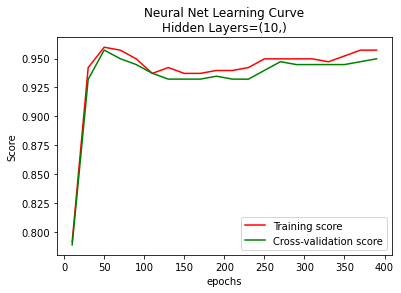

In [42]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='relu',
    alpha=0.01,
    hidden_layer_size=(10,),
    momentum=None,
    solver=None,
    max_epoches=400
)

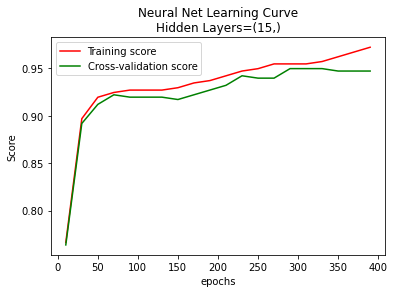

In [43]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='relu',
    alpha=0.01,
    hidden_layer_size=(15,),
    momentum=None,
    solver=None,
    max_epoches=400
)

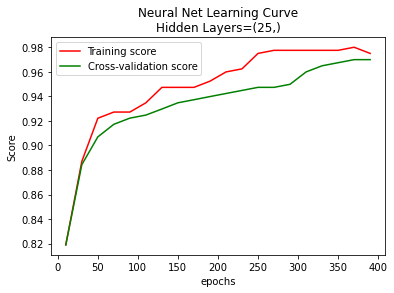

In [44]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='relu',
    alpha=0.01,
    hidden_layer_size=(25,),
    momentum=None,
    solver=None,
    max_epoches=400
)

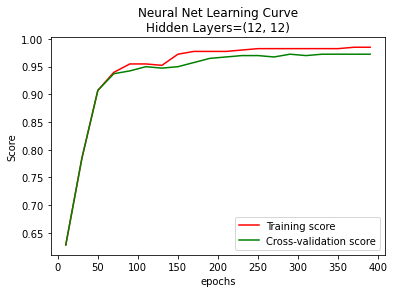

In [45]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='relu',
    alpha=0.01,
    hidden_layer_size=(12, 12),
    momentum=None,
    solver=None,
    max_epoches=400
)

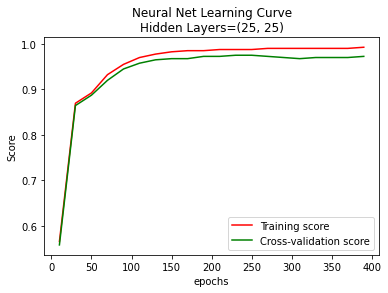

In [46]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='relu',
    alpha=0.01,
    hidden_layer_size=(25, 25),
    momentum=None,
    solver=None,
    max_epoches=400
)

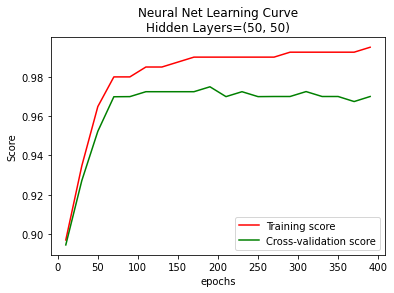

In [47]:
nn_per_epoch(
    X=x_train_mm, 
    y=y_train, 
    activation='relu',
    alpha=0.01,
    hidden_layer_size=(50, 50),
    momentum=None,
    solver=None,
    max_epoches=400
)

### Model complexity analysis

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

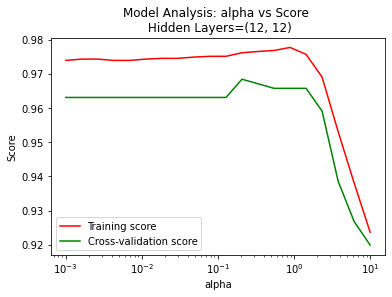

In [48]:
param_range = np.logspace(-3, 1, 20)

nn_clf = MLPClassifier(
    hidden_layer_sizes=(12, 12),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=0
)

plot_model_curve(
    estimator=nn_clf,
    title="Model Analysis: alpha vs Score \n Hidden Layers=(12, 12)",
    X=x_train_mm,
    y=y_train,
    param_name="alpha",
    param_range=param_range,
    cv=10,
    x_scale_is_log=True
)

## Final NN model

Train accuracy: 0.9769604039638897
Test accuracy: 0.9657619047619048
Fit Time: 0.35130910873413085


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

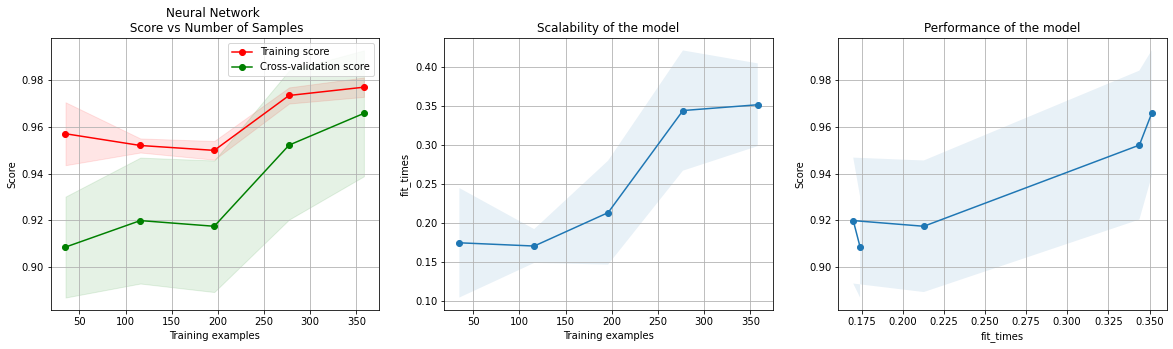

In [51]:
nn_clf = MLPClassifier(
    hidden_layer_sizes=(12, 12),
    activation='relu', 
    alpha=0.9, 
    solver='adam',
    max_iter=200,
    random_state=0
)

plot_learning_curve(
    estimator=nn_clf, 
    title="Neural Network \n Score vs Number of Samples", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [52]:
final_nn_clf = MLPClassifier(
    hidden_layer_sizes=(12, 12),
    activation='relu', 
    alpha=0.9, 
    solver='adam',
    max_iter=200,
    random_state=0
)

final_nn_clf.fit(x_train_mm, y_train)

dt_y_preds = final_nn_clf.predict(x_test_mm)

accuracy_score(y_test, dt_y_preds)

0.9707602339181286

# Boosting

In [53]:
from sklearn.ensemble import AdaBoostClassifier

### Coarse Grid Search

In [58]:
param_grid = [
    {
        'n_estimators': [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
    }
]

dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.035, max_depth=3)

ada_clf = AdaBoostClassifier(dt_clf, random_state=0)

grid_search = GridSearchCV(ada_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'n_estimators': 45}

### Learning Curve Analysis

Train accuracy: 0.9670083565568147
Test accuracy: 0.9217142857142857
Fit Time: 0.026272892951965332


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

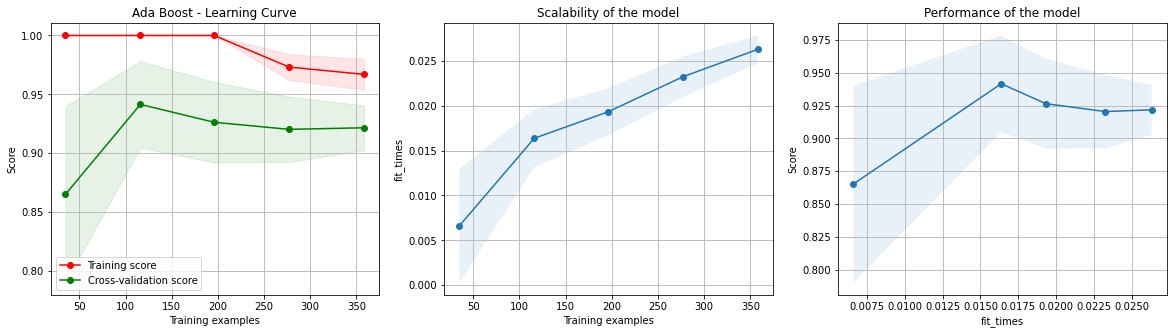

In [116]:
# dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.035, max_depth=3)
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.1, max_depth=3)
ada_clf = AdaBoostClassifier(dt_clf, n_estimators=5, random_state=0)

plot_learning_curve(
    estimator=ada_clf, 
    title="Ada Boost - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

- This is a high variance model (wider gap)
- Model is too complex

### Model Complexity Analysis

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

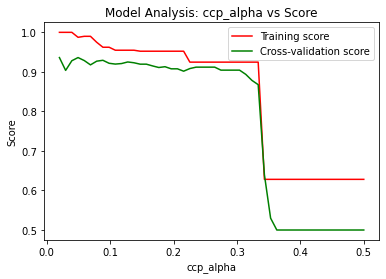

In [77]:
base_dt_param_range = np.linspace(0.02, 0.5, 50)

dt_params = {
    'random_state': 0,
    'max_depth': 3
}

ada_params = {
    'n_estimators': 5,
    'random_state': 0
}

plot_model_curve_boost_base(
    title="Model Analysis: ccp_alpha vs Score",
    X=x_train,
    y=y_train,
    base_dt_param_name="ccp_alpha",
    base_dt_param_range=base_dt_param_range,
    dt_params=dt_params,
    ada_params=ada_params,
    cv=10
)

- ccp_alpha=0.1

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

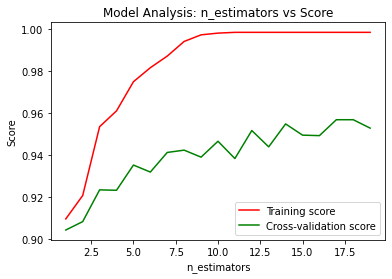

In [106]:
param_range = np.arange(1, 20, 1)

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=5, ccp_alpha=0.085)
ada_clf = AdaBoostClassifier(dt_clf, random_state=0)

plot_model_curve(
    estimator=ada_clf,
    title="Model Analysis: n_estimators vs Score",
    X=x_train,
    y=y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=10
)

### Final AdaBoost Model

Train accuracy: 0.9534986728325789
Test accuracy: 0.9234761904761906
Fit Time: 0.021082043647766113


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

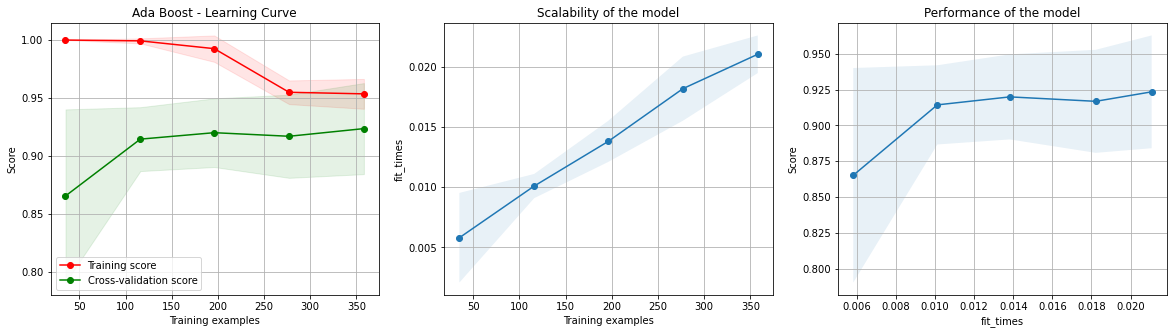

In [110]:
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.085, max_depth=5)
ada_clf = AdaBoostClassifier(dt_clf, n_estimators=3, random_state=0)

plot_learning_curve(
    estimator=ada_clf, 
    title="Ada Boost - Learning Curve", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [118]:
final_dt_boost_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.085, max_depth=5)
final_ada_boost_clf = AdaBoostClassifier(final_dt_boost_clf, n_estimators=3, random_state=0)
final_ada_boost_clf.fit(x_train, y_train)

dt_y_preds = final_ada_boost_clf.predict(x_test)

accuracy_score(y_test, dt_y_preds)

0.9532163742690059

# Support Vector Machine

In [119]:
from sklearn.svm import SVC

### 1) RBF Kernel

In [123]:
# rbf kernel

param_grid = [
    {
        'kernel': ['rbf'],
        'C': [0.001, 0.01, 0.1, 0.5],
        'gamma': [0.001, 0.01, 0.1, 0.5]
    }
]

svc_clf = SVC(random_state=0)

grid_search = GridSearchCV(svc_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}

Train accuracy: 0.9467732936196211
Test accuracy: 0.9203333333333333
Fit Time: 0.010943460464477538


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

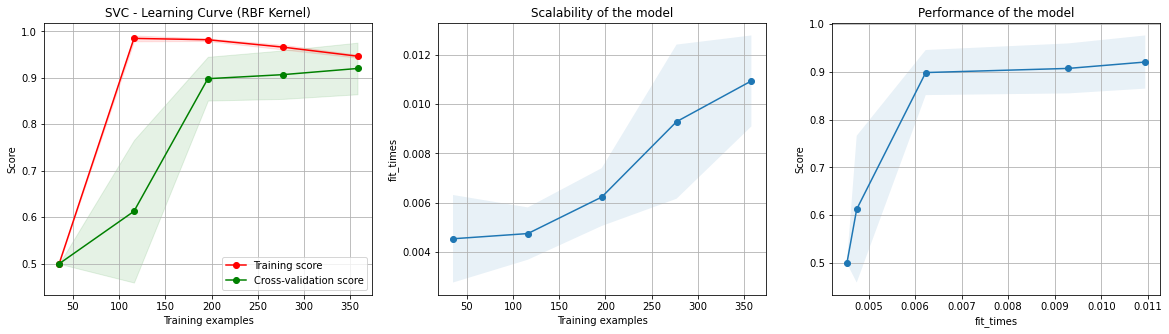

In [124]:
svc_clf = SVC(C=0.5, gamma=0.001, kernel='rbf', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (RBF Kernel)", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Learning Curve Analysis (rbf kernel)

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

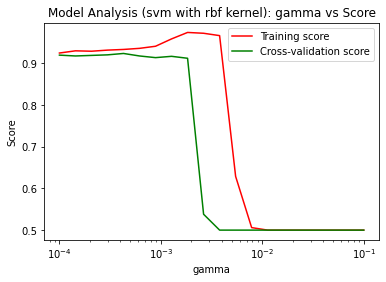

In [126]:
param_range = np.logspace(-4, -1, 20)

svc_clf = SVC(C=0.5, kernel='rbf', random_state=0)

plot_model_curve(
    estimator=svc_clf,
    title="Model Analysis (svm with rbf kernel): gamma vs Score",
    X=x_train,
    y=y_train,
    param_name="gamma",
    param_range=param_range,
    cv=10,
    x_scale_is_log=True
)

- gamma 0.001

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

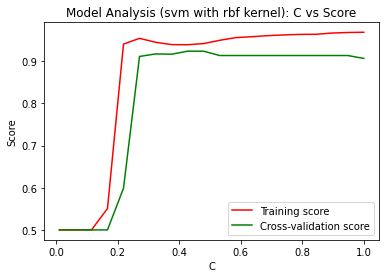

In [139]:
param_range = np.linspace(0.01, 1, 20)

svc_clf = SVC(gamma=0.001, kernel='rbf', random_state=0)


plot_model_curve(
    estimator=svc_clf,
    title="Model Analysis (svm with rbf kernel): C vs Score",
    X=x_train,
    y=y_train,
    param_name="C",
    param_range=param_range,
    cv=10,
    x_scale_is_log=False
)

Train accuracy: 0.9506788247047968
Test accuracy: 0.914095238095238
Fit Time: 0.008896684646606446


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

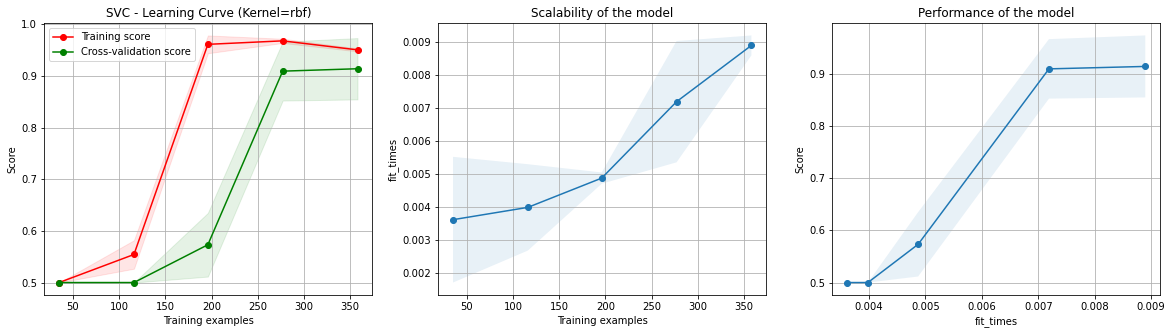

In [141]:
svc_clf = SVC(C=0.3, gamma=0.001, kernel='rbf', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Kernel=rbf)", 
    X=x_train, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [142]:
final_svc_clf = SVC(C=0.3, gamma=0.001, kernel='rbf', random_state=0)
final_svc_clf.fit(x_train, y_train)

dt_y_preds = final_svc_clf.predict(x_test)

accuracy_score(y_test, dt_y_preds)

0.9590643274853801

### 2) Sigmoid Kernel

In [151]:
param_grid = [
    {
        'kernel': ['sigmoid'],
        'C': [0.0001, 0.001, 0.01],
        'gamma': [0.0001, 0.001, 0.01],
    }
]

svc_clf = SVC(random_state=0)

grid_search = GridSearchCV(svc_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'sigmoid'}

Train accuracy: 0.5
Test accuracy: 0.5
Fit Time: 0.006882476806640625


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

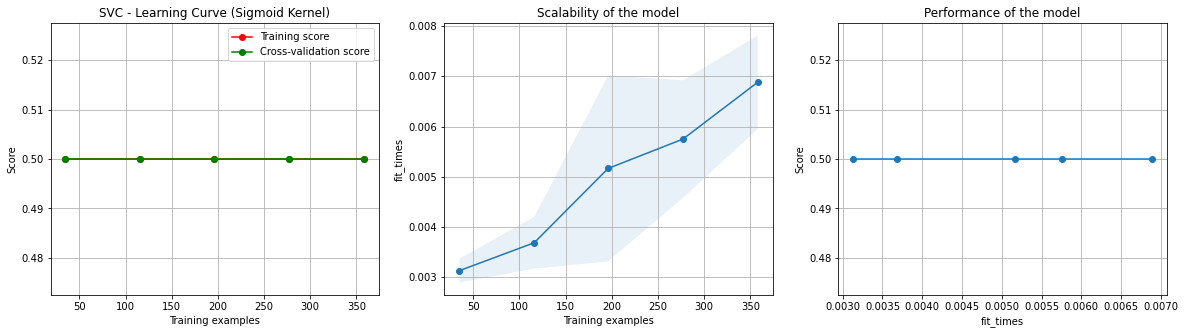

In [152]:
svc_clf = SVC(C=0.0001, gamma=0.0001, kernel='sigmoid', random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Sigmoid Kernel)", 
    X=x_train, 
    y=y_train,
    cv=10
)

### 2) Poly Kernel

In [155]:
param_grid = [
    {
        'kernel': ['poly'],
        'C': [0.0001, 0.001, 0.01],
        'gamma': [0.0001, 0.001, 0.01],
        'degree': [2, 3, 4]
    }
]

svc_clf = SVC(random_state=0, max_iter=100)

grid_search = GridSearchCV(svc_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 0.001, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}

Train accuracy: 0.8999468408271923
Test accuracy: 0.8994285714285712
Fit Time: 0.0051229000091552734


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

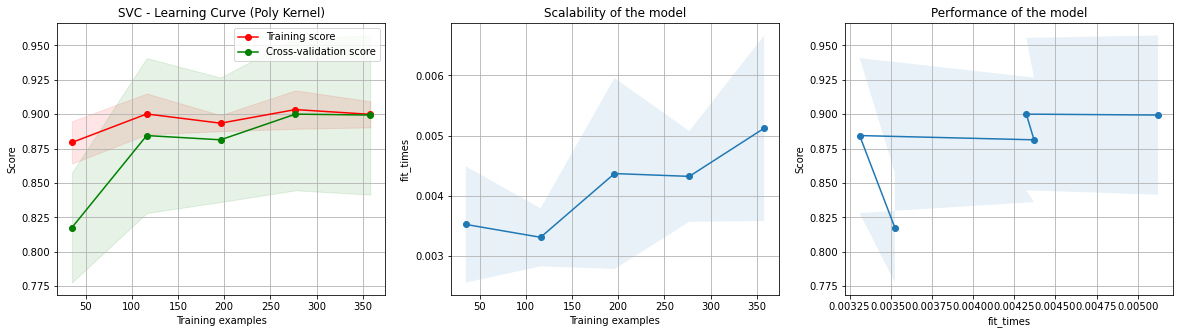

In [157]:
svc_clf = SVC(kernel='poly', C=0.001, gamma=0.0001, degree=2, max_iter=100, random_state=0)

plot_learning_curve(
    estimator=svc_clf, 
    title="SVC - Learning Curve (Poly Kernel)", 
    X=x_train, 
    y=y_train,
    cv=10
)

- High bias, low varience model
- Model is too simple

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

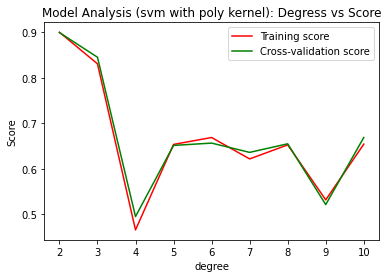

In [174]:
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

svc_clf = SVC(kernel='poly', C=0.001, gamma=0.0001, max_iter=100, random_state=0)


plot_model_curve(
    estimator=svc_clf,
    title="Model Analysis (svm with poly kernel): Degress vs Score",
    X=x_train,
    y=y_train,
    param_name="degree",
    param_range=param_range,
    cv=10,
    x_scale_is_log=False
)

#### Test Accuracy (Poly kernel)

In [175]:
svc_clf = SVC(kernel='poly', C=0.001, gamma=0.0001, degree=2, max_iter=100, random_state=0)
final_svc_clf.fit(x_train, y_train)

dt_y_preds = final_svc_clf.predict(x_test)

accuracy_score(y_test, dt_y_preds)

0.9590643274853801

# K-Nearest Neighbor

In [176]:
from sklearn.neighbors import KNeighborsClassifier

### Coarse Grid Search

In [189]:
param_grid = [
    {
        'n_neighbors': [10, 15, 20, 25],
        'leaf_size': [10, 15, 20, 25],
        'p': [1, 2]
    }
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=10, return_train_score=True)

grid_search.fit(x_train_mm, y_train)

grid_search.best_params_

{'leaf_size': 10, 'n_neighbors': 10, 'p': 2}

Train accuracy: 0.9377305366962181
Test accuracy: 0.9363809523809525
Fit Time: 0.001496601104736328


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

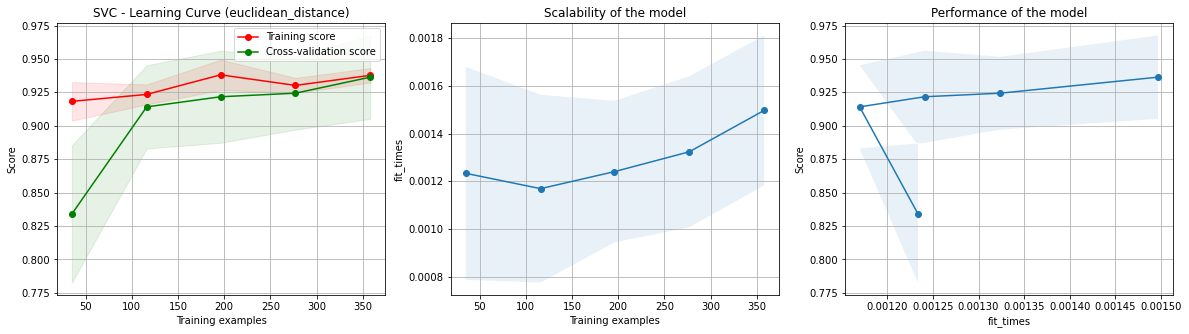

In [190]:
knn_clf = KNeighborsClassifier(n_neighbors=10, leaf_size=5, p=10, weights='uniform')

plot_learning_curve(
    estimator=knn_clf, 
    title="SVC - Learning Curve (euclidean_distance)", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

### euclidean_distance

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

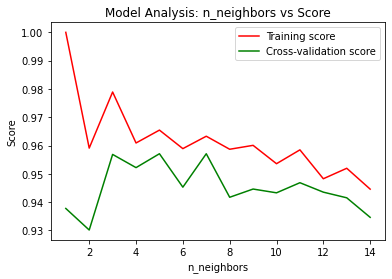

In [191]:
param_range = np.arange(1, 15, 1)

knn_clf = KNeighborsClassifier(leaf_size=10, p=2, weights='uniform')

plot_model_curve(
    estimator=knn_clf,
    title="Model Analysis: n_neighbors vs Score",
    X=x_train_mm,
    y=y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=10
)

- n_neighbours=3 to 7

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

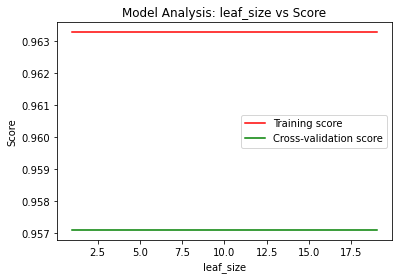

In [193]:
param_range = np.arange(1, 20, 1)

knn_clf = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')

plot_model_curve(
    estimator=knn_clf,
    title="Model Analysis: leaf_size vs Score",
    X=x_train_mm,
    y=y_train,
    param_name="leaf_size",
    param_range=param_range,
    cv=10
)

- No effect from leaf_size

### Final KNN model (p2 / euclidean_distance)

Train accuracy: 0.9588664252359755
Test accuracy: 0.9452857142857143
Fit Time: 0.001258683204650879


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

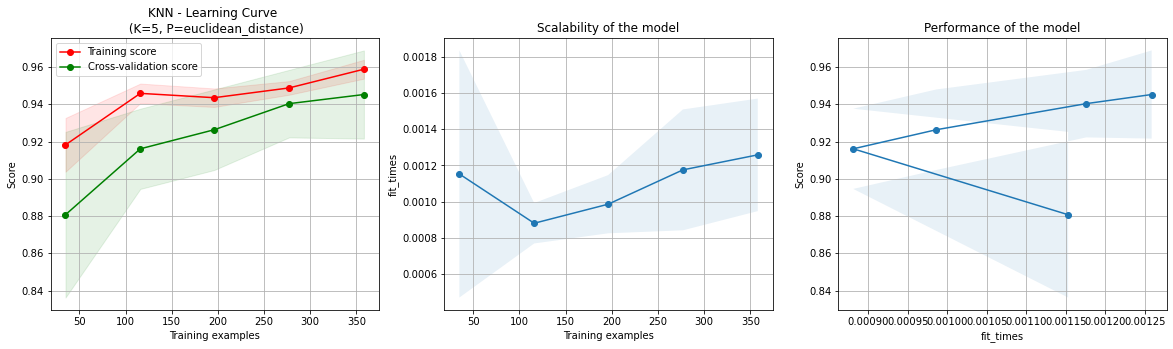

In [203]:
knn_clf = KNeighborsClassifier(n_neighbors=6, p=2, weights='uniform')

plot_learning_curve(
    estimator=knn_clf, 
    title="KNN - Learning Curve \n (K=5, P=euclidean_distance)", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

### Test Accuracy

In [205]:
final_knn_clf = KNeighborsClassifier(n_neighbors=6, p=2)
final_knn_clf.fit(x_train_mm, y_train)
dt_y_preds = final_knn_clf.predict(x_test_mm)
accuracy_score(y_test, dt_y_preds)

0.9473684210526315

## manhattan_distance

<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

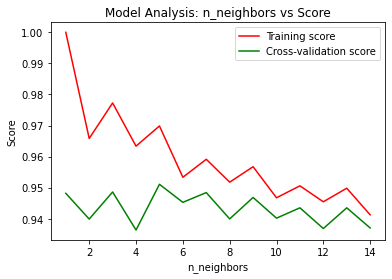

In [201]:
param_range = np.arange(1, 15, 1)

knn_clf = KNeighborsClassifier(leaf_size=10, p=1, weights='uniform')

plot_model_curve(
    estimator=knn_clf,
    title="Model Analysis: n_neighbors vs Score",
    X=x_train_mm,
    y=y_train,
    param_name="n_neighbors",
    param_range=param_range,
    cv=10
)

- n_neighbors=5

### Final KNN model (p1 / manhattan_distance)

Train accuracy: 0.9698426718225914
Test accuracy: 0.951095238095238
Fit Time: 0.0010782718658447266


<module 'matplotlib.pyplot' from '/Users/rahal/opt/anaconda3/envs/cs7641/lib/python3.6/site-packages/matplotlib/pyplot.py'>

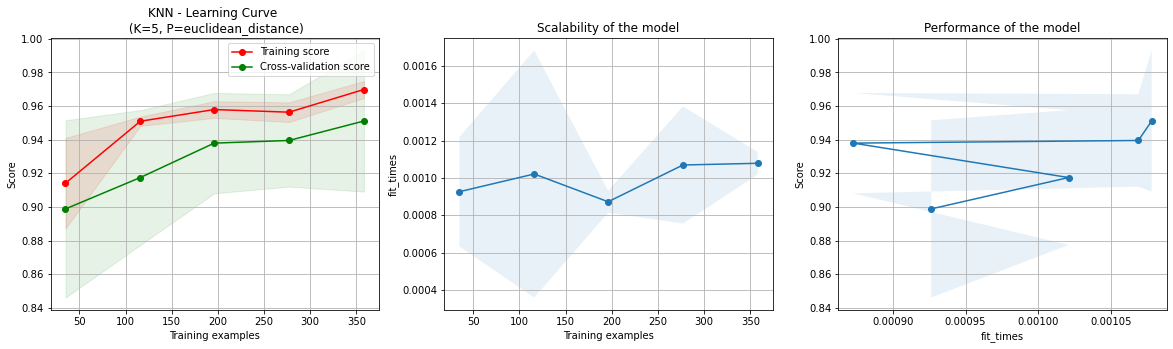

In [202]:
knn_clf = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform')

plot_learning_curve(
    estimator=knn_clf, 
    title="KNN - Learning Curve \n (K=5, P=euclidean_distance)", 
    X=x_train_mm, 
    y=y_train,
    cv=10
)

In [204]:
final_knn_clf = KNeighborsClassifier(n_neighbors=5, p=1)
final_knn_clf.fit(x_train_mm, y_train)
dt_y_preds = final_knn_clf.predict(x_test_mm)
accuracy_score(y_test, dt_y_preds)

0.9415204678362573